In [1]:
import numpy as np
import pandas as pd

In [2]:
fantom_data = pd.read_csv("dataset.tsv",sep = '\t')

In [4]:
fantom_data_noNull = fantom_data.dropna(subset = ['uniprot_id'])

In [6]:
df_MA = fantom_data_noNull[["Astrocyte - cerebellum, donor1.CNhs11321.11500-119F6","brain, adult, donor1.CNhs11796.10084-102B3"]]

In [7]:
df_MA = df_MA[(df_MA.T != 0).any()] 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
M = df_MA["Astrocyte - cerebellum, donor1.CNhs11321.11500-119F6"]-df_MA["brain, adult, donor1.CNhs11796.10084-102B3"]

In [10]:
A = df_MA["Astrocyte - cerebellum, donor1.CNhs11321.11500-119F6"]+(df_MA["brain, adult, donor1.CNhs11796.10084-102B3"]/2)

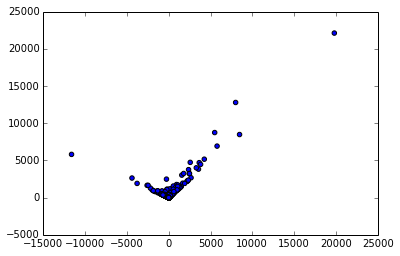

In [11]:
plt.scatter(M,A)

In [ ]:
plt.scatter(M,A),plt.xscale('log'),plt.yscale('log')

In [12]:
fantom_data["breadth"]=(fantom_data_noNull[fantom_data_noNull.columns[3:].values.tolist()].astype('float')>0).sum(axis=1)

In [14]:
fantom_data["avg"]=(fantom_data_noNull[fantom_data_noNull.columns[3:].values.tolist()].astype('float')>0).mean(axis=1)

In [16]:
%matplotlib inline

array([[<matplotlib.axes.AxesSubplot object at 0x7f7bc30ddb90>,
        <matplotlib.axes.AxesSubplot object at 0x7f7bc32d9390>]], dtype=object)

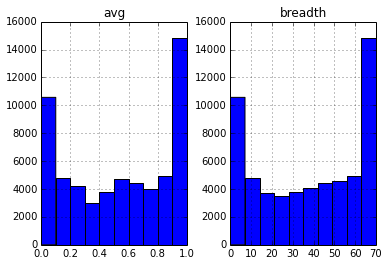

In [17]:
fantom_data[["breadth","avg"]].hist()

In [18]:
fantom_data_avg = fantom_data.dropna(subset = ['avg'])

In [19]:
fantom_data_breadth = fantom_data.dropna(subset = ['breadth'])

In [20]:
coefficients = np.polyfit(fantom_data_breadth['breadth'].ix[:1000],fantom_data_avg['avg'].ix[:1000], 6)
coefficients

array([ -7.42027002e-25,   9.98416812e-23,  -2.92192043e-21,
        -8.05580578e-20,   3.73945114e-18,   1.42857143e-02,
         1.26815160e-16])

In [21]:
polynomial = np.poly1d(coefficients)


In [22]:
r_x = np.arange(0, 72, 0.1)

In [23]:
r_y = polynomial(r_x)

In [24]:
%matplotlib inline

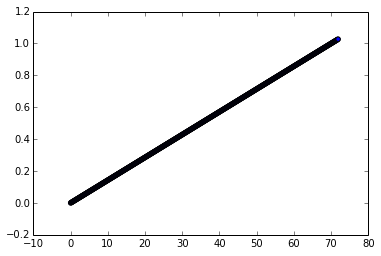

In [25]:
plt.scatter(r_x,r_y)

In [26]:
from scipy.spatial.distance import pdist, squareform

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [28]:
cols = [col for col in fantom_data.columns if col not in ['breadth', 'uniprot_id', 'avg']]

In [29]:
short_cols = [col[0:20] for col in cols]

In [30]:
short_cols = [short_cols[i] + str(i) for i in range(1,len(short_cols),1)]


In [74]:
matrix = squareform(pdist(fantom_data.ix[:1000].ix[:,4:].T))

In [78]:
import seaborn as sns

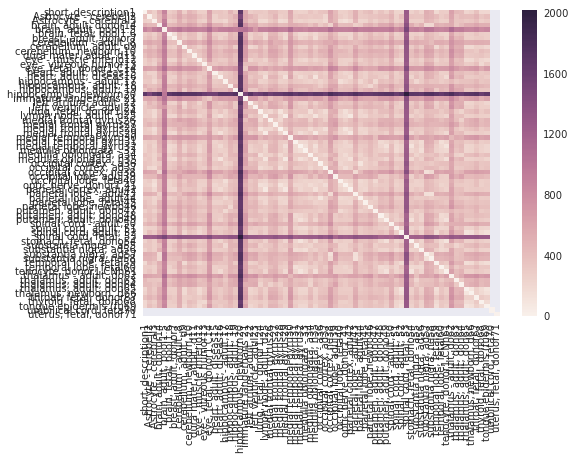

In [81]:
sns.heatmap(matrix,xticklabels=short_cols, yticklabels=short_cols)